Tabel Probabilitas Hujan Menurut Weibul
    Hujan Desain (mm/hari)  Periode Ulang (Tr)
0                    115.0               22.00
1                     81.1               11.00
2                     78.0                7.33
3                     74.0                5.50
4                     72.0                4.40
5                     69.0                3.67
6                     68.6                3.14
7                     62.7                2.75
8                     57.0                2.44
9                     55.0                2.20
10                    54.0                2.00
11                    53.0                1.83
12                    53.0                1.69
13                    46.9                1.57
14                    43.6                1.47
15                    42.5                1.38
16                    37.0                1.29
17                    36.0                1.22
18                    34.2                1.16
19                  

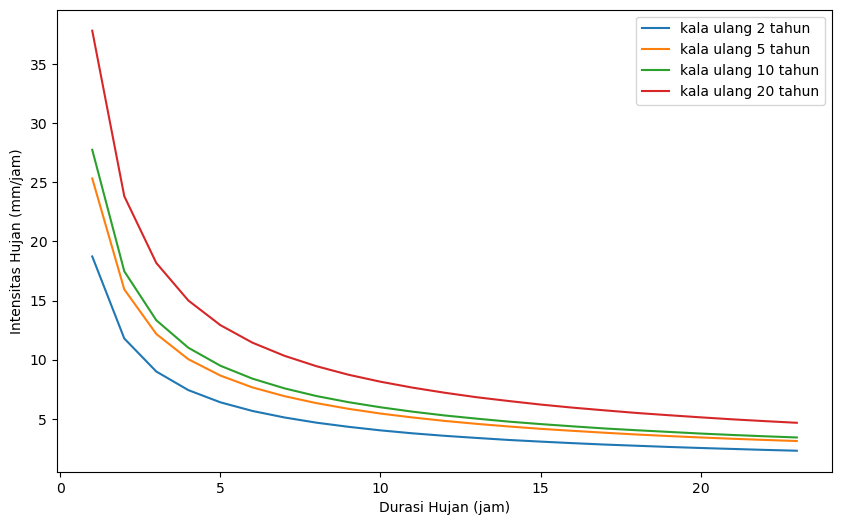

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
fs = 10
R = np.array([17.7, 25.0, 34.2, 36.0, 37.0, 42.5, 43.6, 46.9, 53.0, 53.0, 54.0, 55.0, 57.0, 62.7, 68.6, 69.0, 72.0, 74.0, 78.0, 81.1, 115.0])
T = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

R=np.sort(R, kind='quicksort')[::-1] #mensortir data curah hujan dari besar ke kecil
n=len(R) #banyaknya data
T=[]     #membuat array kosong untuk periode ulang 
for i in range (len(R)): 
    P=(i+1)/(n+1)                # menghitung probabilitas dengan persamaan weibull ploting
    T.append(1/P)                # menyimpan hasil hasil kala ulang 1 / P ke array T

# Membuat Tabel probabilitas Hujan menurut weibull
print("Tabel Probabilitas Hujan Menurut Weibul")
Tprob = {
    'Hujan Desain (mm/hari)': R,
    'Periode Ulang (Tr)': np.round(T,2),
    }
R_empirik=R
dfTprob = pd.DataFrame(Tprob)

# Menampilkan DataFrame
print(dfTprob) 

# Membalik urutan data R dan T (dari kecil ke besar)
R=R[::-1]
T=T[::-1]   
T=np.array(T) #mendefinisikan T sebagai np array 
tr=[2,5,10,20] #untuk kala ulang 10 tahun

Rdesain=np.round(np.interp(tr,T,R))
for i in range(len(tr)):
    print('Hujan desain untuk kala ulang',tr[i],'=',np.round(Rdesain[i],2) ," mm/hari")  
    
##Intensity Duration Frequence Curve Menurut Mononobe
I=[]
tjam=24
for t in range (1,tjam,1): #membuat range waktu dari menit 1 hingga 24 jam
    a=np.round((Rdesain/24)*(24/(t))**(2/3),2) #rumus mononobe
    I.append(a)
I=np.array(I)
t=np.arange(1,tjam,1)
plt.figure(figsize=(10, 6))
for i in range(len(tr)):
    plt.plot(t,I[:,i],label="kala ulang "+str(tr[i])+" tahun")
    # Menambahkan label sumbu
plt.legend(fontsize=fs);
plt.xlabel('Durasi Hujan (jam)',fontsize=fs)
plt.ylabel('Intensitas Hujan (mm/jam)',fontsize=fs)

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
# Membuat DataFrame dari daftar (list)
print("-------------------------------------")
print("Tabel Mononobe Berdasarkan Kala Ulang")


Hasil:
     Normal  Log-Normal  Log Pearson Type III  Gumbel  Genextreme
2     55.97       53.89                 53.86   52.63       53.82
5     74.01       72.94                 73.12   73.70       73.22
10    83.45       84.24                 84.43   87.65       84.74
20    91.23       94.33                 94.44  101.03       94.90
25    93.50       97.41                 97.48  105.27       97.95
50   100.00      106.60                106.45  118.35      106.86
100  105.85      115.34                114.90  131.33      115.02

Uji Kolmogorov-Smirnov:
                      KS Statistic   p-value
Normal                    0.099829  0.971254
Log-Normal                0.101930  0.965559
Log Pearson Type III      0.102631  0.963507
Gumbel                    0.125925  0.852523
Genextreme                0.103401  0.961169


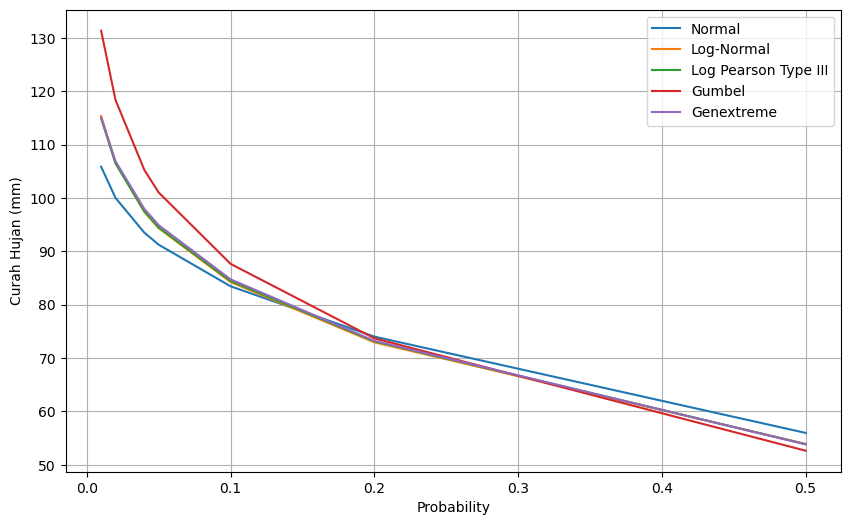

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, pearson3, gumbel_r, kstest, gamma, genextreme

# Data R
R = R
# Periode ulang yang diberikan
tr = [2, 5, 10, 20, 25, 50, 100]#[2, 5, 10, 20, 25, 50, 100, 200, 500, 1000]

# Membuat DataFrame untuk menyimpan hasil
result = pd.DataFrame(index=tr, columns=['Normal', 'Log-Normal', 'Log Pearson Type III', 'Gumbel','Genextreme'])

# Distribusi Normal
mean_normal, std_normal = np.mean(R), np.std(R)
result['Normal'] = [norm.ppf(1 - 1/t) * std_normal + mean_normal for t in tr]

# Distribusi Log-Normal
shape_ln, loc_ln, scale_ln = lognorm.fit(R)
result['Log-Normal'] = [lognorm.ppf(1 - 1/t, shape_ln, loc=loc_ln, scale=scale_ln) for t in tr]

# Distribusi Log Pearson Type III
shape_lp, loc_lp, scale_lp = pearson3.fit(R)
result['Log Pearson Type III'] = [pearson3.ppf(1 - 1/t, shape_lp, loc=loc_lp, scale=scale_lp) for t in tr]

# Distribusi Gumbel
loc_gumbel, scale_gumbel = gumbel_r.fit(R)
result['Gumbel'] = [gumbel_r.ppf(1 - 1/t, loc_gumbel, scale_gumbel) for t in tr]

# Distribusi Generalized extreme value 
params_genex = genextreme.fit(R)
result['Genextreme'] = [genextreme.ppf(1 - 1/t, *params_genex) for t in tr]  # Menggunakan * untuk membuka tuple ke dalam argumen individu

print("Hasil:")
print(result.round(2))  # Pembulatan ke dua angka desimal

# Uji Kolmogorov-Smirnov
print("\nUji Kolmogorov-Smirnov:")
ks_tests = {
    'Normal': kstest(R, 'norm', args=(mean_normal, std_normal)),
    'Log-Normal': kstest(R, 'lognorm', args=(shape_ln, loc_ln, scale_ln)),
    'Log Pearson Type III': kstest(R, 'pearson3', args=(shape_lp, loc_lp, scale_lp)),
    'Gumbel': kstest(R, 'gumbel_r', args=(loc_gumbel, scale_gumbel)),
    'Genextreme' : kstest(R, 'genextreme', args=params_genex)  # Menggunakan tuple langsung
}

ks_results = pd.DataFrame(ks_tests, index=['KS Statistic', 'p-value']).T
print(ks_results)

# Plotting
prb=(1/np.array(tr))
plt.figure(figsize=(10, 6))
plt.plot(prb, result['Normal'], label='Normal')
plt.plot(prb, result['Log-Normal'], label='Log-Normal')
plt.plot(prb, result['Log Pearson Type III'], label='Log Pearson Type III')
plt.plot(prb, result['Gumbel'], label='Gumbel')
plt.plot(prb, result['Genextreme'], label='Genextreme')  # Menggunakan Genextreme yang benar
plt.xlabel('Probability',fontsize=fs)
plt.ylabel('Curah Hujan (mm)',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.grid(True)
plt.show()
